# DA ASSIGNMENT 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler, normalize
import matplotlib.colors
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
FOLDER_PATH = "/content/drive/MyDrive/eq.csv"

In [ ]:
missing_values = ["N/a","na","nan","NaN",'#VALUE!',' ','nan',np.nan]

In [ ]:
df = pd.read_csv(FOLDER_PATH,encoding='unicode_escape',low_memory=False,na_values = missing_values)
df

,Earthquake Engineering Research Centre,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,International Institute of Information Technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Gachibowli, Hyderabad - 500 032 India",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INDIAN EARTHQUAKES CATALOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PERIOD : 2474 BC - 2015 AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52994,52970,2019,7,28,19:24:08,00:54:08/2019-07-29/,3.2,3.2,NaN,3.074275362,2.323765786,2.915005247,32.8°N,78.4°E,10,NaN,NaN,NaN,Jammu & Kashmir,NaN
52995,52971,2019,7,28,10:44:10,16:14:10,3.6,3.6,NaN,3.436594203,2.783008037,3.334732424,25.5°N,90.4°E,70,NaN,NaN,NaN,"Distt. East Garo Hills ,Meghalaya",NaN
52996,52972,2019,7,28,21:25:06,7/29/2019 2:55,4,4,NaN,3.798913043,3.242250287,3.754459601,23.2°N,86.5°E,22,NaN,NaN,NaN,"Distt. Puruliya, West Bengal",NaN
52997,52973,2019,7,29,3:33:53,9:03:53,4.3,4.3,NaN,4.070652174,3.586681975,4.069254984,32.8°N,76.4°E,20,NaN,NaN,NaN,"Distt. Lahaul-Spiti,Himachal Pradesh",NaN


# DATA CLEANING

In [ ]:
df = df.iloc[10:]

In [ ]:
headers_ =['SI. No.','YEAR','MONTH','DATE','ORIGIN TIME(UTC)','IST','MAGNITUDE(Mw)','MAGNITUDE(MW)','MAGNITUDE(Mb1)','MAGNITUDE(Mb)',
           'MAGNITUDE(Ms)','MAGNITUDE(ML)','LAT','LONG','DEPTH(km)','INTENSITY(MM)','INTENSITY(MMI)','INTENSITY(MME)','LOCATION',
           'REFERENCE']

In [ ]:
df.columns = headers_
df.head(5)

,SI. No.,YEAR,MONTH,DATE,ORIGIN TIME(UTC),IST,MAGNITUDE(Mw),MAGNITUDE(MW),MAGNITUDE(Mb1),MAGNITUDE(Mb),MAGNITUDE(Ms),MAGNITUDE(ML),LAT,LONG,DEPTH(km),INTENSITY(MM),INTENSITY(MMI),INTENSITY(MME),LOCATION,REFERENCE
10,1,-2474,0,0,NaN,NaN,7.5,7.5,NaN,6.969202899,7.260619977,7.427072403,71,24,0,NaN,NaN,NaN,NaN,Dr STGR
11,2,-325,0,0,NaN,NaN,7.5,7.5,NaN,6.969202899,7.260619977,7.427072403,71,24,0,NaN,NaN,NaN,NaN,Dr STGR
12,3,25,0,0,NaN,NaN,7.5,7.5,NaN,6.969202899,7.260619977,7.427072403,72.9,33.72,0,NaN,NaN,NaN,NaN,Dr STGR
13,4,26,5,10,08.19.10.0,NaN,6.1397,6.1397,5.737047101,5.737047101,5.698851894,5.999685205,17.3,80.1,NaN,NaN,NaN,NaN,NaN,NEIC
14,5,26,5,10,08.19.10.0,NaN,6.1397,6.1397,5.737047101,5.737047101,6.075520196,5.999685205,26,97,80,NaN,NaN,NaN,Myanmar,G-R


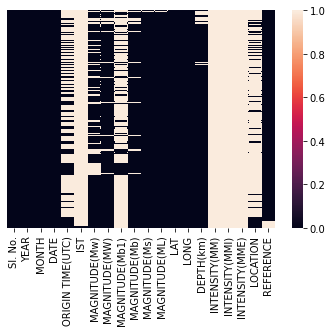

In [ ]:
sns.heatmap(df.isnull(),yticklabels = False)

\# from the heatmap ,IST,Magnitude(Mb1),Intensity(MM),Intensity(MMMI),Intensity(MME) approximately 90% above data filled with Nan/NA value ,so drop that column .

\# And also have to predict Mw (Ms,Mb,ML,Mw,Mb1 are derived from MW) so these column also no further useful so drop 
that column too.

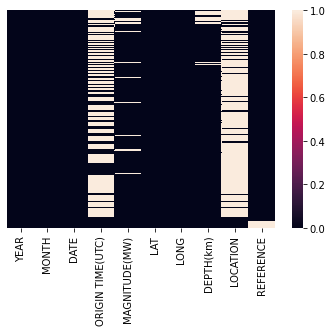

In [ ]:
df.drop('IST', axis=1, inplace=True)
df.drop('INTENSITY(MM)', axis=1, inplace=True)
df.drop('INTENSITY(MMI)', axis=1, inplace=True)
df.drop('INTENSITY(MME)',axis=1, inplace=True)
df.drop('MAGNITUDE(Ms)', axis=1, inplace=True)
df.drop('MAGNITUDE(Mb)', axis=1, inplace=True)
df.drop('MAGNITUDE(ML)',axis=1, inplace=True)
df.drop('MAGNITUDE(Mw)', axis=1, inplace=True)
df.drop('MAGNITUDE(Mb1)', axis=1, inplace=True)
df.drop('SI. No.', axis=1, inplace=True)
sns.heatmap(df.isnull(),yticklabels = False)


\# from the heatmap  again we see that Origin time(Utc) ans Location are 60% ans 82% filled with Nan/N/A value so, again dropped that column

In [ ]:
a = df['ORIGIN TIME(UTC)'].isnull().sum()
b ,c = df.shape

print("% of data have null value \n")
print((a/b)*100)

% of data have null value 

60.01811696767254


In [ ]:
df.drop('ORIGIN TIME(UTC)',axis=1, inplace=True)

In [ ]:
a = df['LOCATION'].isnull().sum()
b ,c = df.shape

print("% of data have null value \n")
print((a/b)*100)

% of data have null value 

82.30953594142181


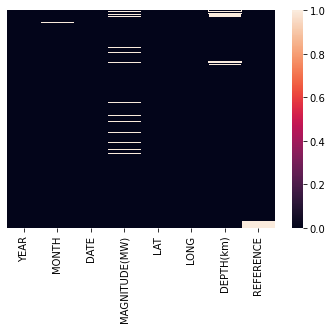

In [ ]:
df.drop('LOCATION',axis=1, inplace=True)
sns.heatmap(df.isnull(),yticklabels = False)

Here we dropped the row with negative value because year cant be negative and also drop Nan row coressponding DATA and MONTH 

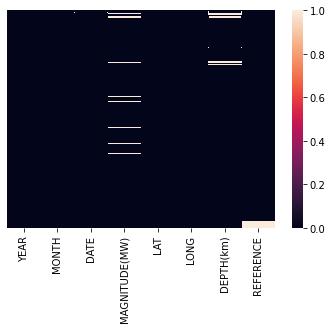

In [ ]:
df.drop(df[df['YEAR'].astype(int) < 0].index, inplace = True)
df['DATE'].dropna()
df['MONTH'].dropna()
sns.heatmap(df.isnull(),yticklabels = False)

In [ ]:
df.isnull().sum()

YEAR                0
MONTH              20
DATE               57
MAGNITUDE(MW)    2507
LAT                 0
LONG                0
DEPTH(km)        2178
REFERENCE        1582
dtype: int64

Reference is categorical attribute and filled with some Nan value so drop that clomun because it work as a outlier

In [ ]:
df['REFERENCE'].dropna()
# df.drop('REFERENCE',axis=1, inplace=True)
df["REFERENCE"] = df["REFERENCE"].astype("category")
df['REFERENCE'] = df['REFERENCE'].cat.codes
df.isnull().sum()

YEAR                0
MONTH              20
DATE               57
MAGNITUDE(MW)    2507
LAT                 0
LONG                0
DEPTH(km)        2178
REFERENCE           0
dtype: int64

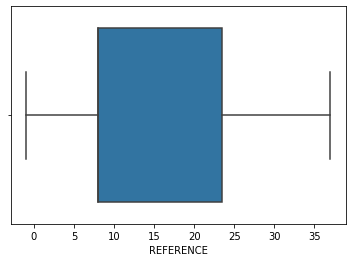

In [ ]:
sns.boxplot(x='REFERENCE', data= df)

Observing from boxplot there are no any outlier present in reference and also less null value in the reference column , the unique value of reference is less and it help us to classify the labels.

Making new feature by combining year month and date in one column,because it is composite attribute ,so combined them to  form a meaningful result

In [ ]:
date_col = df[df.columns[0:3]]
date_ = date_col.set_axis(['year', 'month', 'day'],axis = 'columns')
date_

,year,month,day
12,25,0,0
13,26,5,10
14,26,5,10
15,50,0,0
16,110,0,0
...,...,...,...
52994,2019,7,28
52995,2019,7,28
52996,2019,7,28
52997,2019,7,29


In [ ]:
df['date'] = pd.to_datetime(date_, infer_datetime_format=True, errors = 'coerce')
df.head(5)

,YEAR,MONTH,DATE,MAGNITUDE(MW),LAT,LONG,DEPTH(km),REFERENCE,date
12,25,0,0,7.5,72.9,33.72,0,8,NaT
13,26,5,10,6.1397,17.3,80.1,NaN,26,NaT
14,26,5,10,6.1397,26,97,80,9,NaT
15,50,0,0,7,69.5,37.1,0,8,NaT
16,110,0,0,6.5,76.47,18.1,0,8,NaT


we combined the "YEAR,MONTH,DATE" into one column i.e."date"so no use of these ,so idea of droping that column dont affect classification

In [ ]:
df = df.drop(['YEAR', 'MONTH', 'DATE'] ,axis = 1)
df.head(5)

,MAGNITUDE(MW),LAT,LONG,DEPTH(km),REFERENCE,date
12,7.5,72.9,33.72,0,8,NaT
13,6.1397,17.3,80.1,NaN,26,NaT
14,6.1397,26,97,80,9,NaT
15,7,69.5,37.1,0,8,NaT
16,6.5,76.47,18.1,0,8,NaT


In [ ]:
df.isnull().sum()

MAGNITUDE(MW)    2507
LAT                 0
LONG                0
DEPTH(km)        2178
REFERENCE           0
date              116
dtype: int64

date column have some Nat vale e.g. -2007-07-09 or 2007-13-1 or 2007-12-32 , so these type of date is not poosible so droped  that column

In [ ]:
df = df[~df['date'].isin(['NaT'])]
df = df.reset_index(drop=True)
print(df.isnull().sum())
df.head(5)

MAGNITUDE(MW)    2459
LAT                 0
LONG                0
DEPTH(km)        2123
REFERENCE           0
date                0
dtype: int64


,MAGNITUDE(MW),LAT,LONG,DEPTH(km),REFERENCE,date
0,6.5,99.900,026.50,000.00,8,1688-06-14
1,7.2,94.600,027.75,000.00,8,1697-02-13
2,7.0,72.150,021.75,000.00,8,1705-02-04
3,NaN,19.1,73.3,NaN,26,1720-07-15
4,6.5,77.100,028.37,000.00,8,1720-07-15


IN the depth column value are in the form of float the "mode" is not usefull to repalce null so repalced with mean is perfect as compare to mode 

In [ ]:
df['DEPTH(km)']=df['DEPTH(km)'].astype(float)
df['DEPTH(km)'] = df['DEPTH(km)'].fillna(df['DEPTH(km)'].mean())
df['DEPTH(km)'].isnull().sum()

0

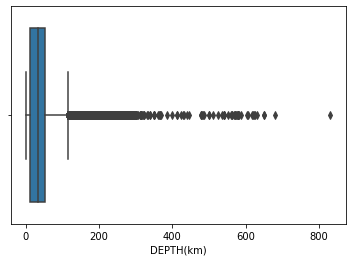

In [ ]:
sns.boxplot(x='DEPTH(km)', data= df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


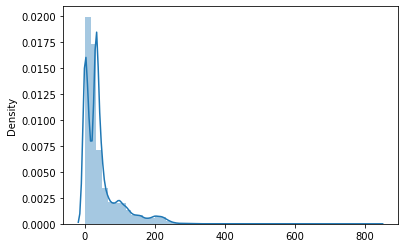

In [ ]:
sns.distplot(x=df['DEPTH(km)'])

IN the Magnitude column value are in the form of float the "mode" is not usefull to repalce null so repalced with mean is perfect as compare to mode 

In [ ]:
df['MAGNITUDE(MW)']=df['MAGNITUDE(MW)'].astype(float)
df['MAGNITUDE(MW)'] = df['MAGNITUDE(MW)'].fillna(df['MAGNITUDE(MW)'].mean())
df['MAGNITUDE(MW)'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


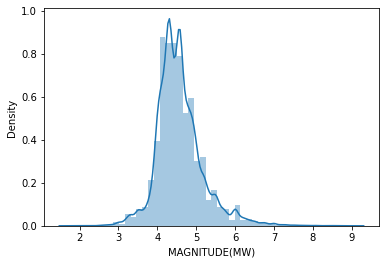

In [ ]:
sns.distplot(df['MAGNITUDE(MW)'])

In [ ]:
def to_float(value):
  try:
    return float(value)
  except:
    return np.nan

def correct_LATandLONG( X ) :
  if str(X)[-1] == '-' :
    X = -1 * to_float(str(X)[:-1])
    return X
  else :
    return to_float(str(X))

In "LAT" and "LONG" column data in the form for 23.5,23.5N,23.5S,23.5W,23.5?,23.5°N,23.5°S that is not possible to convert directly to float.

Extract all N,°N,°S,S,W,°W,E,°E,-,? and

23.5°N to 23.5

23.5N to 23.5

23.5S to -23.5

23.5°S to -23.5

23.5°E to 23.5

23.5E to 23.5

23.5W to -23.5

23.5°W to -23.5

In [ ]:
df['LAT'] = df['LAT'].replace({'-':'',',':'', ' ':'', 'N':'','°':'','\?':'','S':'-'}, regex=True)
df['LONG'] = df['LONG'].replace({'-':'',',':'' ,' ':'', 'E': '','°':'','\?':'','S':'','W':'-'}, regex=True)

In [ ]:
df['LAT']=df['LAT'].apply(correct_LATandLONG)
df['LONG']=df['LONG'].apply(correct_LATandLONG)

In [ ]:
df['LAT'] = df['LAT'].fillna(0)
df['LONG'] = df['LONG'].fillna(0)

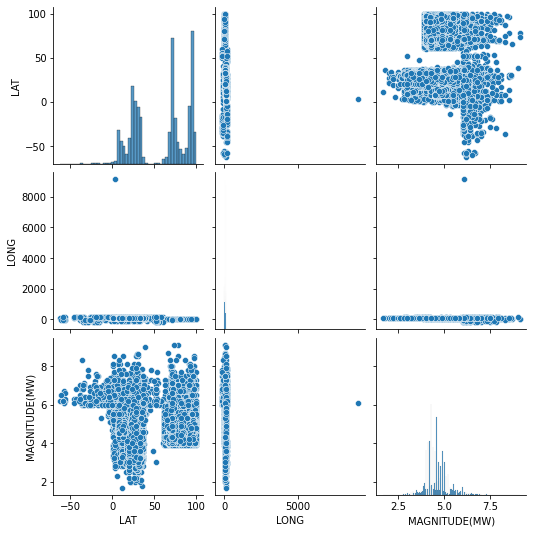

In [ ]:
sns.pairplot(df[['LAT','LONG','MAGNITUDE(MW)']])

In [ ]:
df.select_dtypes(['object']).columns 

Index([], dtype='object')

In [ ]:
df.isnull().sum()

MAGNITUDE(MW)    0
LAT              0
LONG             0
DEPTH(km)        0
REFERENCE        0
date             0
dtype: int64

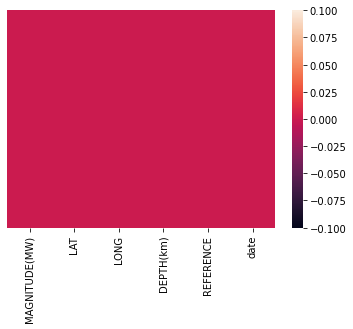

In [ ]:
sns.heatmap(df.isnull(),yticklabels = False)

In [ ]:
type(df['date'])

pandas.core.series.Series

In [ ]:
df['date'] = df['date'].values.astype(float)

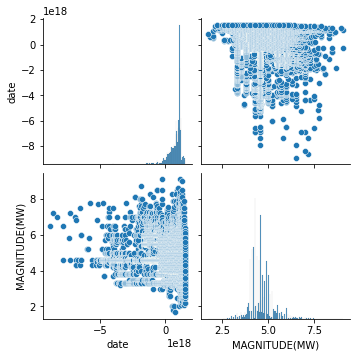

In [ ]:
sns.pairplot(df[['date','MAGNITUDE(MW)']])

In [ ]:
df.head(5)

,MAGNITUDE(MW),LAT,LONG,DEPTH(km),REFERENCE,date
0,6.500000,99.90,26.50,0.000000,8,-8.884771e+18
1,7.200000,94.60,27.75,0.000000,8,-8.611229e+18
2,7.000000,72.15,21.75,0.000000,8,-8.359632e+18
3,4.575922,19.10,73.30,45.615873,26,-7.872336e+18
4,6.500000,77.10,28.37,0.000000,8,-7.872336e+18


Extracting cloumn name "magnitude(MW)" anvert into label using appropiate threshold between 4-5 ,after that drop that column fronm dataframe because its not feature .

In [ ]:
class_ = df['MAGNITUDE(MW)']
df.drop('MAGNITUDE(MW)', axis=1, inplace=True)

\# corr() is the function that correlates the quantitative variables

\#color bar on the right of heatmap can be enabled by setting true for cbar

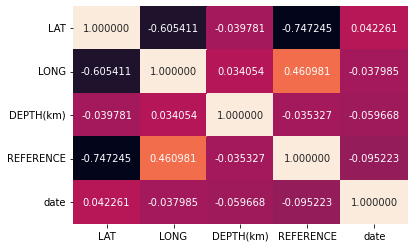

In [ ]:
sns.heatmap(df.corr(),annot=True,fmt="f",cbar=False)

Including required column for classification and for checking classification result also inclding required metrics 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split

Converting All data in equal range and normalise data using min max scaler

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df)
X.shape

(52871, 5)

# Selection process for best threshold 

The idea is to select best threshold is , we randomly choose k and run any classification algorithm and in which case the accuracy and auc is more so sececting that threshold value for further observation

In [ ]:
threshold = [4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0]
acc_scr = []
roc_scr = []
for th in threshold:
  label=[]
  for x in class_:
    if float(x) > th:
      label.append(1)
    else:
      label.append(0)
  label= np.array(label)

  X_train, X_test, y_train, y_test = train_test_split(X, label, random_state=42)

  ran_clf = RandomForestClassifier(n_estimators = 300,max_depth=16, random_state = 42)
  ran_clf.fit(X_train, y_train)
  y_pred = ran_clf.predict(X_test)
  acc_scr.append(accuracy_score(y_test, y_pred))
  print(ran_clf.__class__.__name__, accuracy_score(y_test, y_pred))
  y_pred_ = ran_clf.predict_proba(X_test)[:,1]
  roc_scr.append(roc_auc_score(y_test,y_pred_))
  print("Area under curve : ",roc_auc_score(y_test,y_pred_))

RandomForestClassifier 0.8847026781661371
Area under curve :  0.7879621902097267
RandomForestClassifier 0.8251626569829021
Area under curve :  0.781000945298272
RandomForestClassifier 0.7694810107429263
Area under curve :  0.7793894539068501
RandomForestClassifier 0.7371009229838099
Area under curve :  0.7998704313668081
RandomForestClassifier 0.7374791950370707
Area under curve :  0.8102617747449854
RandomForestClassifier 0.7321833862914208
Area under curve :  0.8100262457547625
RandomForestClassifier 0.7455742169768498
Area under curve :  0.7981189020712309
RandomForestClassifier 0.7638825843546678
Area under curve :  0.7996766519870312
RandomForestClassifier 0.7952035103646543
Area under curve :  0.8021489507062254
RandomForestClassifier 0.8345438039037676
Area under curve :  0.8118062258000807
RandomForestClassifier 0.8705553033741867
Area under curve :  0.8157002156387801


Text(0, 0.5, 'score')

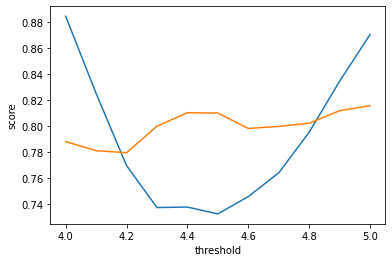

In [ ]:
plt.plot(threshold,acc_scr)
plt.plot(threshold,roc_scr)
plt.xlabel('threshold')
plt.ylabel('score')

Best threshold value is 4.0 ,4.1,5.0  and selected 4.0 because on this threshol we get better accuracy. 

In [ ]:
threshold = 4.0 ##[4,5]
label=[]
for x in class_:
  if float(x) > threshold:
    label.append(1)
  else:
    label.append(0)

label= np.array(label)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, label, random_state=42)

# KNN

In [ ]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Run knn classifier for n_neighbors = 1-41 for finding better value of k

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

mean_acc = np.zeros(40)
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    y_pred= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, y_pred)
mean_acc

array([0.82334695, 0.77250719, 0.8602663 , 0.84498411, 0.86851263,
       0.86420033, 0.87343017, 0.87078227, 0.87774247, 0.87683462,
       0.87857467, 0.87827205, 0.87865033, 0.87948252, 0.8790286 ,
       0.87834771, 0.8790286 , 0.87759116, 0.87812074, 0.87751551,
       0.87857467, 0.87804509, 0.87849902, 0.87849902, 0.87887729,
       0.87887729, 0.8790286 , 0.87940687, 0.87880163, 0.8790286 ,
       0.87933122, 0.87925556, 0.87933122, 0.87970949, 0.88008776,
       0.88008776, 0.87993645, 0.88016341, 0.88016341, 0.8808443 ])

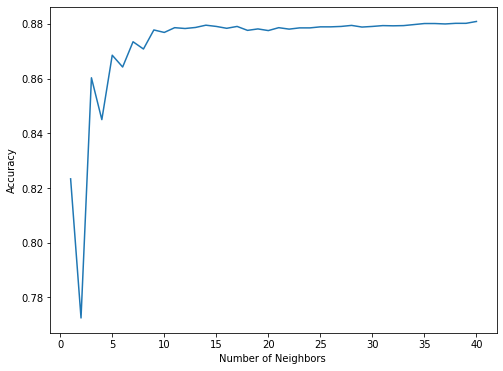

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(range(1,41), mean_acc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

we get k= 11-50 acuuracy approximatly same , so for selecting best parameter we use gridbase search with K-fold which are used for hyperparameter tunning

KNeighborsClassifier 0.8777424723861401


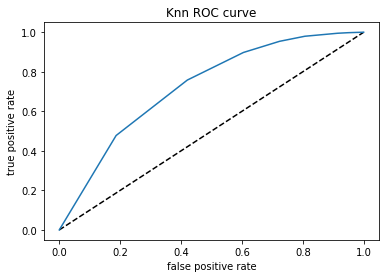

KNeighborsClassifier 0.8781207444394008


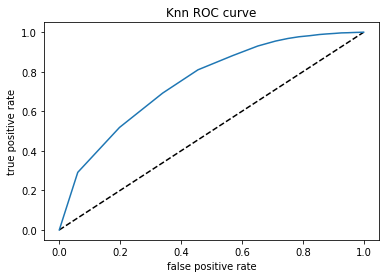

KNeighborsClassifier 0.8788772885459222


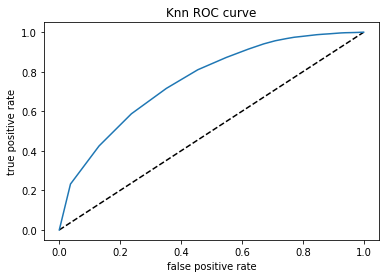

KNeighborsClassifier 0.879331215009835


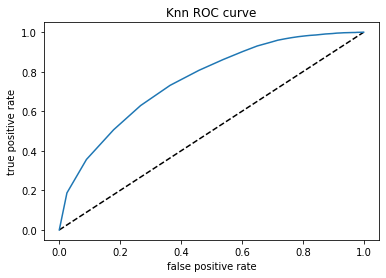

KNeighborsClassifier 0.8801634135270087


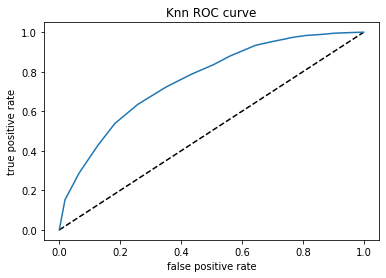

In [ ]:
from sklearn.metrics import roc_curve
k = [9,19,25,31,39]
for i in k:
  knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  print(knn.__class__.__name__, accuracy_score(y_test, y_pred))
  y_pred_ = knn.predict_proba(X_test)[:,1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr, label='Knn')
  plt.xlabel('false positive rate')
  plt.ylabel('true positive rate')
  plt.title('Knn ROC curve')
  plt.show()

we run the model on different value of k and calculating area under considering accuray score  , and slecting that model for KNN classification which is 25.

In [ ]:
clf = KNeighborsClassifier()
parameters = {'n_neighbors':range(3,50)}
knn_clf = GridSearchCV(clf, parameters,
                   cv = 10,
                   scoring = 'accuracy')
grid_search =knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
print(knn_clf.__class__.__name__, accuracy_score(y_test, y_pred))
print(grid_search.best_params_)

GridSearchCV 0.8790285973672265
{'n_neighbors': 27}


when tunnig the model we get best parameter  is 27 , for this value of k we calculating the area under curve

KNeighborsClassifier 0.8790285973672265
Area under curve :  0.7562935087871623


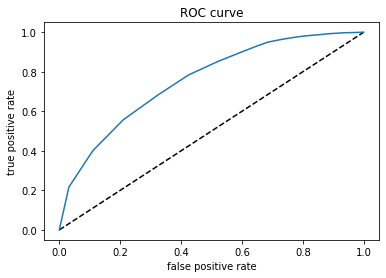

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 27).fit(X_train,y_train)

y_pred = knn.predict(X_test)
print(knn.__class__.__name__, accuracy_score(y_test, y_pred))
y_pred_ = knn.predict_proba(X_test)[:,1]
print("Area under curve : ",roc_auc_score(y_test,y_pred_))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()

Getting Max Area under curve and accuracy score using k=27 , so it is best parameter value for K. Becuse better clissifier have max auc score

### BEST parametr for knn classification is:
#### best K=27 

#### accuracy score: 87.9

#### Auc(Area under curve): 75.62 

# DECISION TREE

In [ ]:
dec_clf = DecisionTreeClassifier()
dec_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.8195642305946437


Basic method to find max_depth is to run all possible value, so here uses 1-40 to find best value of k behalf of accuracy score

In [ ]:
max_depth=[]
acc_gini=[]
acc_entropy=[]
for i in range(1,40):
    clf=DecisionTreeClassifier(criterion='gini',max_depth=i)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc_gini.append(accuracy_score(y_test,y_pred))
    
    clf=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    
    acc_entropy.append(accuracy_score(y_test,y_pred))
    
    max_depth.append(i)
    
    d=pd.DataFrame({'acc_gini': pd.Series(acc_gini),
                   'acc_entropy': pd.Series(acc_entropy),
                   'max_depth': pd.Series(max_depth)})

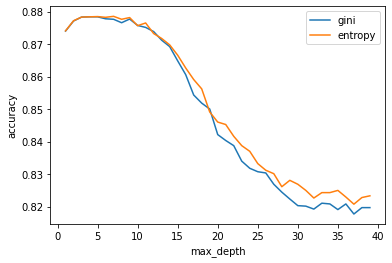

In [ ]:
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

On the above observation concluded that gini and entropy working approximately same and best value of k in between 3-15


so for finding best parammeter we again tune similarly  as knn for gini and entropy 

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy',random_state = 42)
tree2 = GridSearchCV(clf, parameters,
                   cv = 10,
                   scoring = 'accuracy')
grid_search =tree2.fit(X_train, y_train)
y_pred = tree2.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(grid_search.best_params_)

0.8783477076713573
{'max_depth': 3}


DecisionTreeClassifier 0.8783477076713573
Area under curve:  0.6808589635708873


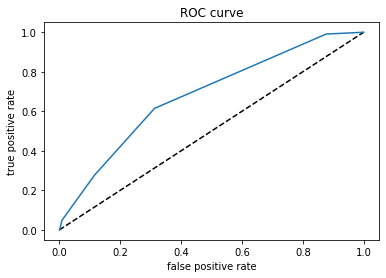

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.__class__.__name__,accuracy_score(y_test, y_pred))

y_pred_ = clf.predict_proba(X_test)[:,1]
print("Area under curve: ",roc_auc_score(y_test,y_pred_))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': range(2,15)}

clf = DecisionTreeClassifier(criterion='gini',random_state = 42)
tree1 = GridSearchCV(clf, parameters,
                   cv = 10,
                   scoring = 'accuracy')
grid_search =tree1.fit(X_train, y_train)

In [ ]:
y_pred = tree1.predict(X_test)
print(tree1.__class__.__name__,accuracy_score(y_test, y_pred))
print(grid_search.best_params_)

GridSearchCV 0.8784233620820093
{'max_depth': 5}


DecisionTreeClassifier 0.8784233620820093
Area under curve:  0.7293425309526554


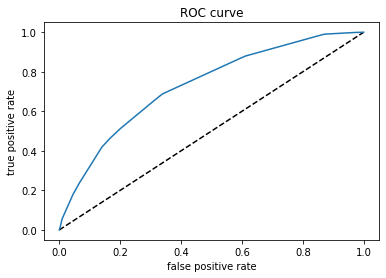

In [ ]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

y_pred_ = clf.predict_proba(X_test)[:,1]
print("Area under curve: ",roc_auc_score(y_test,y_pred_))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()

from above observation we see that gini give better result as compare to entropy , so considering gini we check for various max_depth and calulating accuracy and area under curve

In [ ]:
def decisionTree(leaf):
  clf = DecisionTreeClassifier(min_samples_leaf=leaf,random_state = 42)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

  y_pred_ = clf.predict_proba(X_test)[:,1]
  print("Area under curve: ",roc_auc_score(y_test,y_pred_))
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr, label='Knn')
  plt.xlabel('false positive rate')
  plt.ylabel('true positive rate')
  plt.title('ROC curve')
  plt.show()

DecisionTreeClassifier 0.8237252231805114
Area under curve:  0.6462330640816121


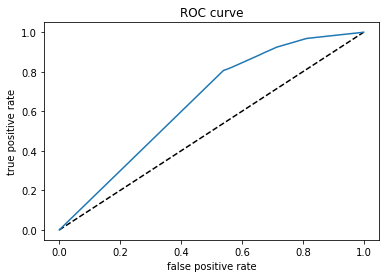

In [ ]:
decisionTree(3)

DecisionTreeClassifier 0.8346194583144197
Area under curve:  0.6734255996189444


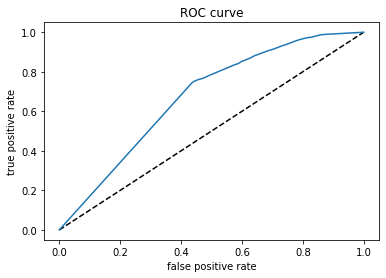

In [ ]:
decisionTree(5)

DecisionTreeClassifier 0.8589801785444091
Area under curve:  0.7008093070565077


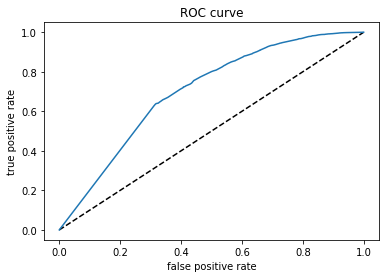

In [ ]:
decisionTree(10)

In [ ]:
def decisionTree(split):
  clf = DecisionTreeClassifier(min_samples_leaf=10,min_samples_split=split,random_state = 42)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

  y_pred_ = clf.predict_proba(X_test)[:,1]
  print("Area under curve: ",roc_auc_score(y_test,y_pred_))
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr, label='Knn')
  plt.xlabel('false positive rate')
  plt.ylabel('true positive rate')
  plt.title('ROC curve')
  plt.show()

DecisionTreeClassifier 0.8589801785444091
Area under curve:  0.7008093070565077


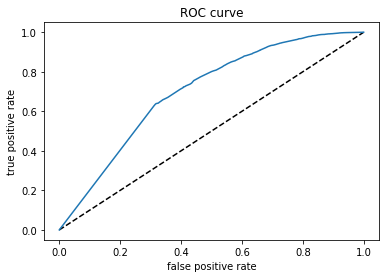

In [ ]:
decisionTree(16)

DecisionTreeClassifier 0.8676047813587532
Area under curve:  0.7101539082139559


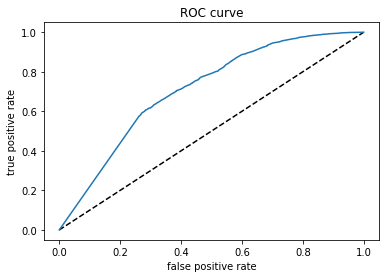

In [ ]:
decisionTree(32)

Various obsertion are done on max_depth,min_samples_leaf and min samples_split and , got best parameter 5,10,32 on behalf of accuracy score and roc_auc_score

DecisionTreeClassifier 0.8784233620820093
Area under curve:  0.7295419441140051


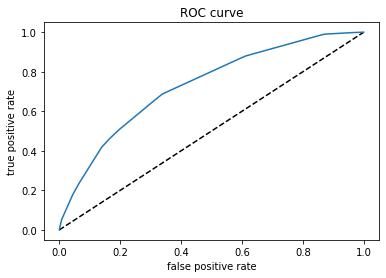

In [ ]:
clf = DecisionTreeClassifier(max_depth=5,min_samples_leaf=10,min_samples_split=32,random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

y_pred_ = clf.predict_proba(X_test)[:,1]
print("Area under curve: ",roc_auc_score(y_test,y_pred_))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()

Run decision classifier  on diffrent max_depth,min_samples_split,min_sample_leaf , on this observation auc and acc got max on parameter(mention below) .Better classifier depend upon max value of auc score

### Best parameter for Decision Tree

#### max_depth = 5

#### min_samples_split = 32

#### min_samples_leaf = 10

#### accuracy score = 87.8

#### roc_auc_score = 72.9

In [ ]:
print(df.columns)

Index(['LAT', 'LONG', 'DEPTH(km)', 'REFERENCE', 'date'], dtype='object')


In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree

feat_representation = tree.export_text(clf)
print(feat_representation)

|--- feature_4 <= 0.98
|   |--- feature_0 <= 0.91
|   |   |--- feature_4 <= 0.93
|   |   |   |--- feature_4 <= 0.68
|   |   |   |   |--- feature_1 <= 0.03
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  0.03
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.68
|   |   |   |   |--- feature_4 <= 0.90
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  0.90
|   |   |   |   |   |--- class: 1
|   |   |--- feature_4 >  0.93
|   |   |   |--- feature_0 <= 0.49
|   |   |   |   |--- feature_4 <= 0.96
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  0.96
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.49
|   |   |   |   |--- feature_1 <= 0.03
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  0.03
|   |   |   |   |   |--- class: 1
|   |--- feature_0 >  0.91
|   |   |--- feature_4 <= 0.90
|   |   |   |--- feature_4 <= 0.83
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.83
|   | 

## From the tree visualisation we clearly see that Feature_4 i.e."date" and Feature_0 i.e "LAT" ,these 2 subsets of feature are best for earthquek prediction

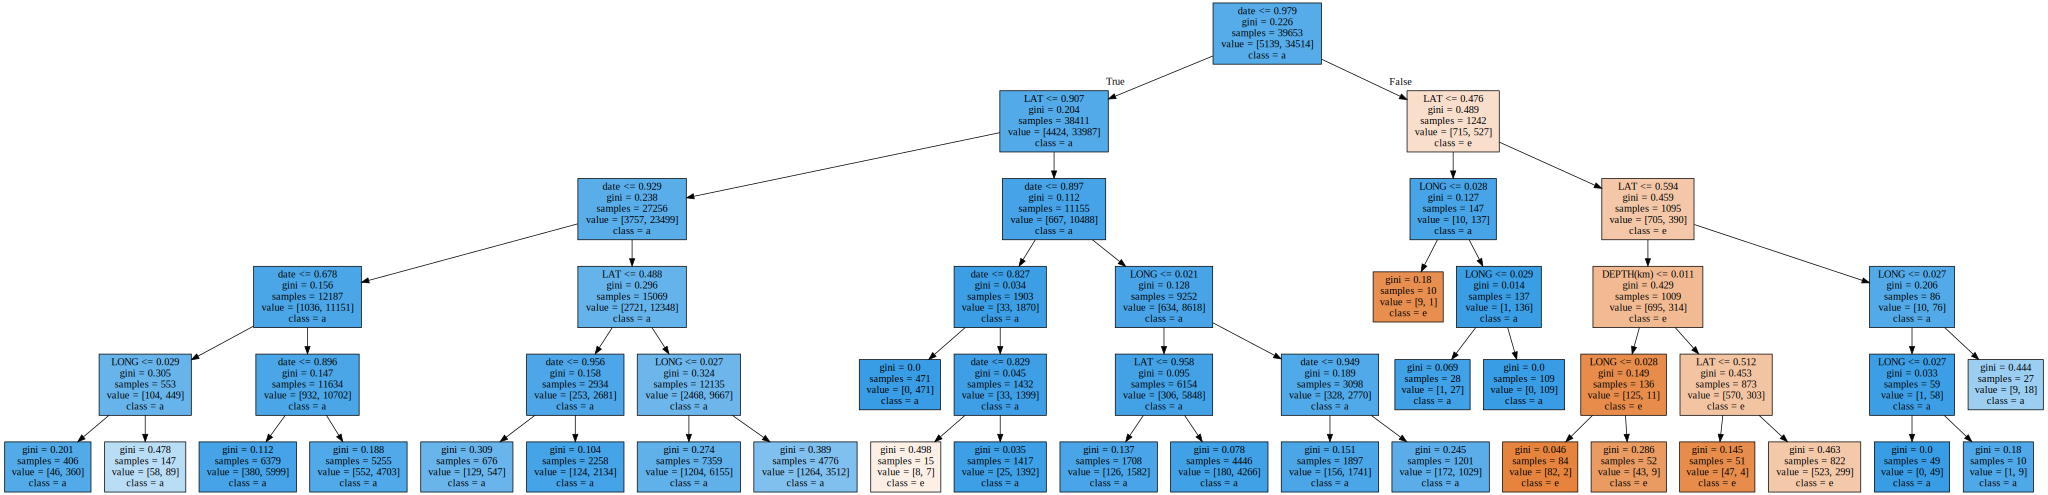

In [ ]:
import graphviz
tree_ = tree.export_graphviz(clf, out_file=None, 
                                feature_names=df.columns,  
                                class_names="earthquek",
                                filled=True)
# Draw graph
graph = graphviz.Source(tree_, format="png") 
graph

## From the above structure we see that Top node i.e"data" and next chaild node i.e."LAT" which are highly importantant feature which are use to predict "Earthquek"

#Ensemble method

# RANDOM Forest

In [ ]:
ran_clf = RandomForestClassifier()
ran_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ran_clf = RandomForestClassifier(n_estimators = 500,max_depth=16, random_state = 42)
ran_clf.fit(X_train, y_train)
y_pred = ran_clf.predict(X_test)
print(ran_clf.__class__.__name__, accuracy_score(y_test, y_pred))

y_pred_ = ran_clf.predict_proba(X_test)[:,1]
print("Area under curve : ",roc_auc_score(y_test,y_pred_))

RandomForestClassifier 0.88409744288092
Area under curve :  0.7885651969463616


Observation for identifying best number of estimators so run algorithm on the n_estimators  = 100,200,400,500,1000

In [ ]:
def randomForest(n_estm):
  ran_clf = RandomForestClassifier(n_estimators = n_estm,max_depth=16, random_state = 42)
  ran_clf.fit(X_train, y_train)
  y_pred = ran_clf.predict(X_test)
  print(ran_clf.__class__.__name__, accuracy_score(y_test, y_pred))

  y_pred_ = ran_clf.predict_proba(X_test)[:,1]
  print("Area under curve: ",roc_auc_score(y_test,y_pred_))
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr, label='Knn')
  plt.xlabel('false positive rate')
  plt.ylabel('true positive rate')
  plt.title('ROC curve')
  plt.show()

RandomForestClassifier 0.8838704796489635
Area under curve:  0.7861548689674982


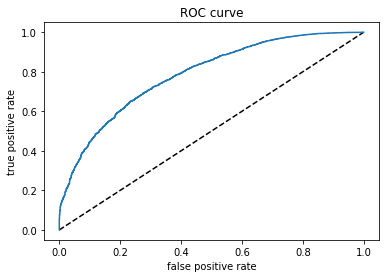

In [ ]:
randomForest(100)

RandomForestClassifier 0.8843244061128763
Area under curve:  0.7878242695351868


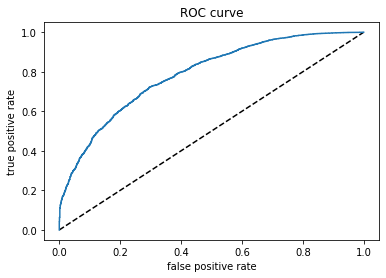

In [ ]:
randomForest(200)

RandomForestClassifier 0.8842487517022243
Area under curve:  0.7886129709031247


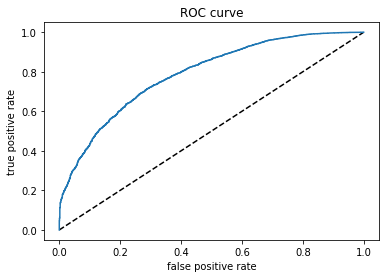

In [ ]:
randomForest(400)

RandomForestClassifier 0.88409744288092
Area under curve:  0.7885651969463616


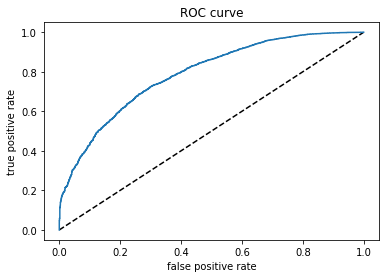

In [ ]:
randomForest(500)

RandomForestClassifier 0.8844000605235285
Area under curve:  0.7886985785878546


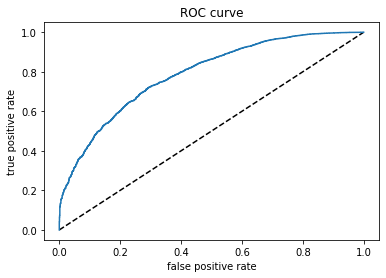

In [ ]:
randomForest(1000)

best value for n_estimators is 1000, now this result is use to identy max_depth.

so again run this algorithm for max_depth = 4,8,16,32

In [ ]:
def randomForest(depth):
  ran_clf = RandomForestClassifier(n_estimators = 1000 ,max_depth=depth, random_state = 42)
  ran_clf.fit(X_train, y_train)
  y_pred = ran_clf.predict(X_test)
  print(ran_clf.__class__.__name__, accuracy_score(y_test, y_pred))

  y_pred_ = ran_clf.predict_proba(X_test)[:,1]
  print("Area under curve: ",roc_auc_score(y_test,y_pred_))
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr, label='Knn')
  plt.xlabel('false positive rate')
  plt.ylabel('true positive rate')
  plt.title('ROC curve')
  plt.show()

RandomForestClassifier 0.8800877591163565
Area under curve:  0.774173013536563


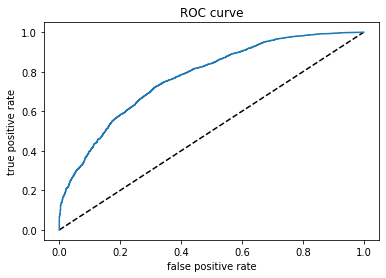

In [ ]:
randomForest(8)

RandomForestClassifier 0.8786503253139658
Area under curve:  0.7331361989863401


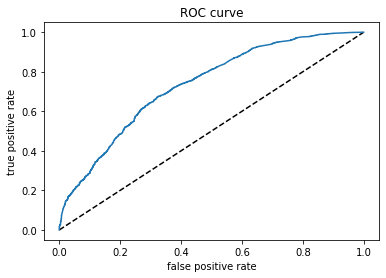

In [ ]:
randomForest(4)

RandomForestClassifier 0.8804660311696172
Area under curve:  0.7696110571047887


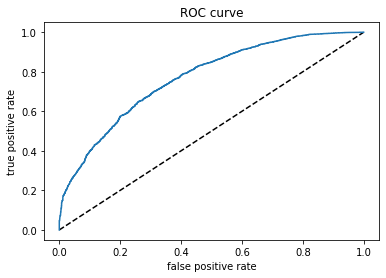

In [ ]:
randomForest(30)

better result got in case of n_estimators=1000 and max_depth=16. and this result are used for finding best value of min_samples_leaf=2,3,4,5

In [ ]:
def randomForest(leaf_node):
  ran_clf = RandomForestClassifier(n_estimators = 1000 ,max_depth=16,min_samples_leaf=leaf_node ,random_state = 42)
  ran_clf.fit(X_train, y_train)
  y_pred = ran_clf.predict(X_test)
  print(ran_clf.__class__.__name__, accuracy_score(y_test, y_pred))

  y_pred_ = ran_clf.predict_proba(X_test)[:,1]
  print("Area under curve: ",roc_auc_score(y_test,y_pred_))
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr, label='Knn')
  plt.xlabel('false positive rate')
  plt.ylabel('true positive rate')
  plt.title('ROC curve')
  plt.show()

RandomForestClassifier 0.88409744288092
Area under curve:  0.7907129963825681


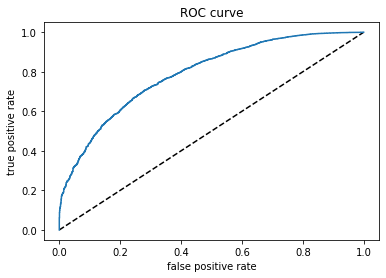

In [ ]:
randomForest(2)

RandomForestClassifier 0.8844757149341806
Area under curve:  0.7916210565692334


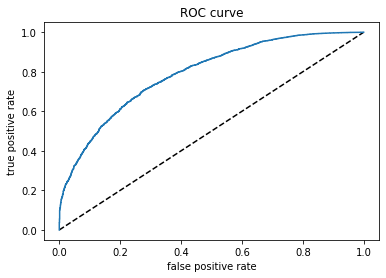

In [ ]:
randomForest(3)

RandomForestClassifier 0.8842487517022243
Area under curve:  0.7930770718682599


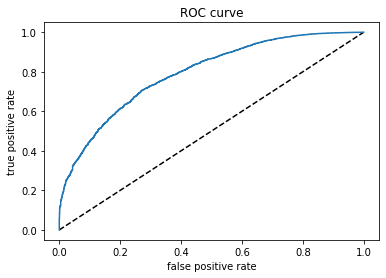

In [ ]:
randomForest(4)

RandomForestClassifier 0.8838704796489635
Area under curve:  0.7934003828813843


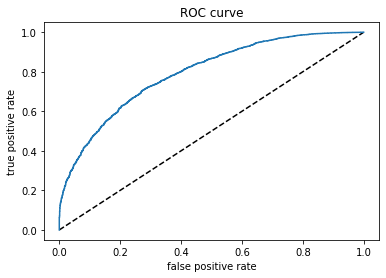

In [ ]:
randomForest(5)

best min_samples_leaf = 3,

RandomForestClassifier 0.8844757149341806
Area under curve:  0.7916210565692334


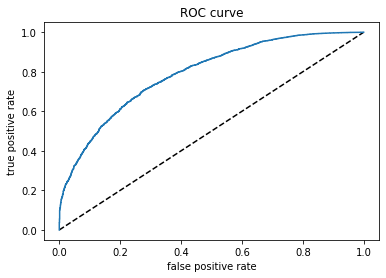

In [ ]:
ran_clf = RandomForestClassifier(n_estimators = 1000 ,max_depth=16,min_samples_leaf=3,random_state = 42)
ran_clf.fit(X_train, y_train)
y_pred = ran_clf.predict(X_test)
print(ran_clf.__class__.__name__, accuracy_score(y_test, y_pred))

y_pred_ = ran_clf.predict_proba(X_test)[:,1]
print("Area under curve: ",roc_auc_score(y_test,y_pred_))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()

During hyperparameter tunning run algorithm serializably and evaluste matric i.e. accuracy score and roc_auc score which is good classification matric for deining best classifier and mention below parametr got during running serializable manner and at last we run again classifier on best parameter and got better result in form of accurcy and auc score,so undobetly it is best parameter on behalf of AUC 

## BEST parameter Ensamble method(Random forest)

#### n_estimators = 1000

#### max_depth = 16

#### min_samples_leaf = 3

#### accuracy_score = 88.44

#### roc_auc_score = 79.16


Classification report

In [ ]:
import pandas as pd
metric = {'Accuracy': [87.9028,87.8423,88.4475],
        'ROC_AUC': [75.6293,72.9541,79.1621]
        }

scr = pd.DataFrame(metric, columns = ['Accuracy','ROC_AUC'], index=['KNN','Decision Tree','Random Forest'])
scr

,Accuracy,ROC_AUC
KNN,87.9028,75.6293
Decision Tree,87.8423,72.9541
Random Forest,88.4475,79.1621


### Among all 3 classifier KNN give better result as compare to the decision tree because of accuracy score of KNN is greater that that of Decision tree ans also KNN area under curve also greater that Decision tree.


### Now comapring RANDOM forest . Both acuuracy score and area unde curve getting with help of random forest classifier is greater than KNN that are ploted on above box.

## So clearly says that with help of ensemble method we got best result so RANDOM forest(ensemble learning classifier) is best classifier among other two classifiers(Knn,decision tree) 

####   Already covert 'YEAR' ,'MONTH','DATE' combine to a new feature that is 'date' And LAT(north) ,LONG(east) if combine these 2 to form a 'Location' which are also reasionable feature to conclude the accuracy so ,combine both feature into one feature and evaluate new result after combining from new features

In [ ]:
df.head(5)

,LAT,LONG,DEPTH(km),REFERENCE,date
0,99.90,26.50,0.000000,8,-8.884771e+18
1,94.60,27.75,0.000000,8,-8.611229e+18
2,72.15,21.75,0.000000,8,-8.359632e+18
3,19.10,73.30,45.615873,26,-7.872336e+18
4,77.10,28.37,0.000000,8,-7.872336e+18


In [ ]:
df.drop('REFERENCE', axis=1, inplace=True)
df.drop('DEPTH(km)', axis=1, inplace=True)
df.head(5)

,LAT,LONG,date
0,99.90,26.50,-8.884771e+18
1,94.60,27.75,-8.611229e+18
2,72.15,21.75,-8.359632e+18
3,19.10,73.30,-7.872336e+18
4,77.10,28.37,-7.872336e+18


In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df)
print(X.shape)

(52871, 3)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, label, random_state=42)

RandomForestClassifier 0.8812225752761386
Area under curve:  0.77161492608527


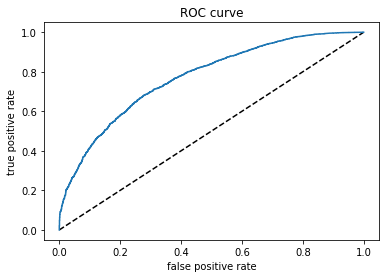

In [ ]:
ran_clf = RandomForestClassifier(n_estimators = 1000 ,max_depth=16,min_samples_leaf=3,random_state = 42)
ran_clf.fit(X_train, y_train)
y_pred = ran_clf.predict(X_test)
print(ran_clf.__class__.__name__, accuracy_score(y_test, y_pred))

y_pred_ = ran_clf.predict_proba(X_test)[:,1]
print("Area under curve: ",roc_auc_score(y_test,y_pred_))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.14      0.24      1714
           1       0.89      0.99      0.94     11504

    accuracy                           0.88     13218
   macro avg       0.80      0.57      0.59     13218
weighted avg       0.86      0.88      0.85     13218



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[  246  1468]
 [   99 11405]]


##### with the new set of features there is minute change in accuracy ,the new set of features are "DATE","YEAR","MONTH" are combined and the new feature is "date" and "Lat" and "Long" which are feature got from decision tree node . and on the new featre approximatly same as previous accuracy

## Visualise dataset with help of PCA

In [ ]:
from sklearn.decomposition import PCA
scaler = MinMaxScaler()
X = scaler.fit_transform(df)
X.shape

(52871, 5)

In [ ]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)
x_pca.shape

(52871, 2)

In [ ]:
df_pca = pd.DataFrame(data = x_pca, columns = ['feat1', 'feat2'] )
df_pca.head()

,feat1,feat2
0,-0.263368,-0.179784
1,-0.243042,-0.152785
2,-0.155159,-0.045029
3,0.417401,-0.084391
4,-0.175608,-0.064837


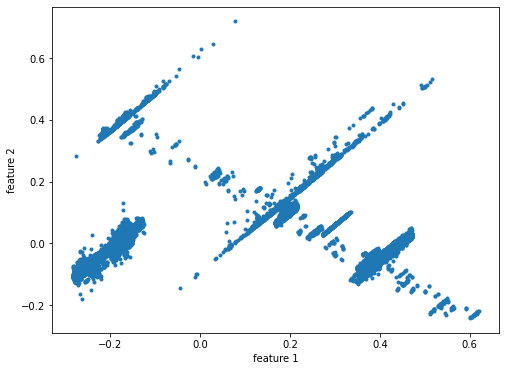

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.scatter(df_pca['feat1'], df_pca['feat2'],marker='.')

In [ ]:
label_df = pd.DataFrame(data = label, columns = ['cls'] )
import plotly.express as px
fig = px.scatter(x_pca, x=0, y=1, color=label_df['cls'],width=1000, height=1000)
fig.show()